In [1]:
#importing libraries

import numpy as np
import pandas as pd

In [2]:
#reading the dataset

data_set=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
data_set.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
#checking the shape of the dataframe
data_set.shape

(907, 27)

In [5]:
#checking the null values

data_set.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [6]:
#dropping the columns with all null values

df=data_set.dropna(how='all',axis=1)

In [7]:
df.shape

(907, 22)

In [8]:
#checking the datypes of the columns
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
other_fuel2                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

#DATA PREPROCESSING

In [9]:
#filling teh owner column with govt because nan values have source Central Govt. Authority 

df['owner']=df['owner'].replace(np.NaN,'Govt')

<ipython-input-9-22cf43100ec7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['owner']=df['owner'].replace(np.NaN,'Govt')


In [10]:
#filling nan values with the mode of geolocation_source

df['geolocation_source']=df['geolocation_source'].replace(np.NaN,'WRI')

<ipython-input-10-38aa57c8ed8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geolocation_source']=df['geolocation_source'].replace(np.NaN,'WRI')


In [11]:
#replacing  nan values of other fuel with other as we do not type of fuel used 

df['other_fuel1']=df['other_fuel1'].replace(np.NaN,'Other')

<ipython-input-11-00bf2f2a7b0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['other_fuel1']=df['other_fuel1'].replace(np.NaN,'Other')


In [12]:
df['generation_data_source']=df['generation_data_source'].replace(np.NaN,'others')

<ipython-input-12-94ccf222fdc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['generation_data_source']=df['generation_data_source'].replace(np.NaN,'others')


In [13]:
#fillong nan values with 2019 as the data is extracted in 2019

df['year_of_capacity_data']=df['year_of_capacity_data'].replace(np.NaN,2019)

<ipython-input-13-7d9b40d9a5ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_capacity_data']=df['year_of_capacity_data'].replace(np.NaN,2019)


In [14]:
#filling null values of numerical data columns with zero

df=df.fillna(0)

In [15]:
#dropping  categorical columns as they most of the null values
#drooping url and country long column as it has zero contribution in dat

df=df.drop(['other_fuel2','url','country_long','country','year_of_capacity_data','name','gppd_idnr','owner','source'],axis=1)

In [16]:
df.shape

(907, 13)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(906, 13)

#DATA VISUALISATION

In [19]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

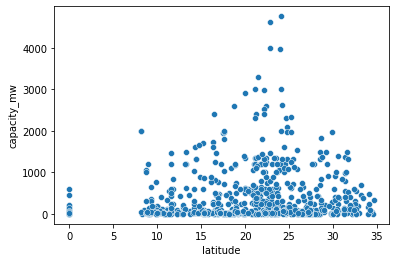

In [21]:
sns.scatterplot(x='latitude' ,y='capacity_mw', data=df);

 Capacity_mw is scattered between latitude 10 to 35.It has no realtion with the target variable as it shows no relation.

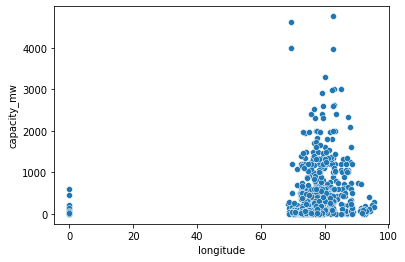

In [22]:
sns.scatterplot(x='longitude' ,y='capacity_mw', data=df);

 Capacity_mw is scattered between longitude 70 to 98.It has no realtion with the target variable as it shows no relation.
 

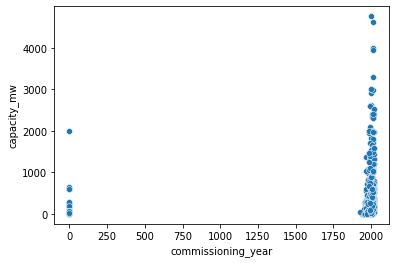

In [23]:
sns.scatterplot(x='commissioning_year' ,y='capacity_mw', data=df);

commisioning year has no realtion with the capacity_mw as the data points are accumulated shows no relation.

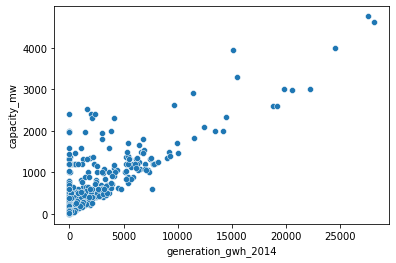

In [24]:
sns.scatterplot(x='generation_gwh_2014' ,y='capacity_mw', data=df);

 generation_gwh_2014 and capacity_mw have positive linear relation. As the capacity_mw increases generationgwh also increases.
 Data points are accumulated near 0 value as those are anan values which were imputed with 0.

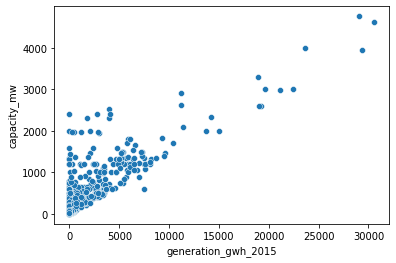

In [25]:
sns.scatterplot(x='generation_gwh_2015' ,y='capacity_mw', data=df);

 generation_gwh_2015 and capacity_mw have positive linear relation. As the capacity_mw increases generationgwh also increases.
 Data points are accumulated near 0 value as those are anan values which were imputed with 0.

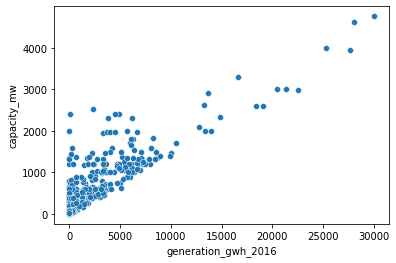

In [26]:
sns.scatterplot(x='generation_gwh_2016' ,y='capacity_mw', data=df);

 generation_gwh_2016 and capacity_mw have positive linear relation. As the capacity_mw increases generationgwh also increases.
 Data points are accumulated near 0 value as those are anan values which were imputed with 0.

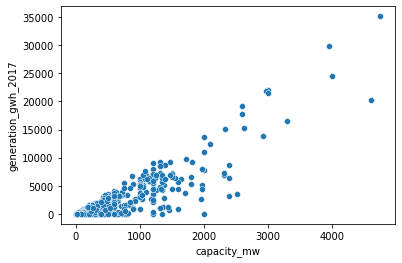

In [27]:
sns.scatterplot(x='capacity_mw' ,y='generation_gwh_2017', data=df);

 generation_gwh_2017 and capacity_mw have positive linear relation. As the capacity_mw increases generationgwh also increases.
 Data points are accumulated near 0 value as those are anan values which were imputed with 0.

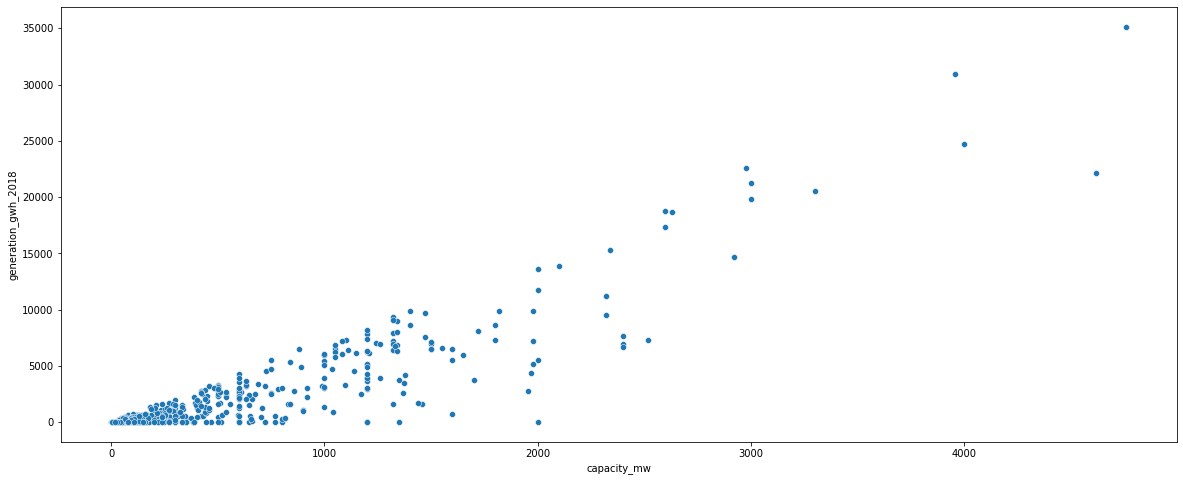

In [28]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='capacity_mw' ,y='generation_gwh_2018', data=df);

 generation_gwh_2018 and capacity_mw have positive linear relation. As the capacity_mw increases generationgwh also increases.
 Data points are accumulated near 0 value as those are anan values which were imputed with 0.

<Figure size 1440x576 with 0 Axes>

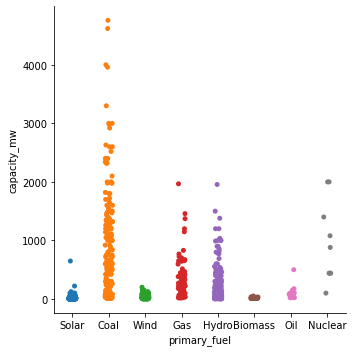

In [29]:
plt.figure(figsize=(20,8))
sns.catplot(x='primary_fuel',y='capacity_mw',data=df);


Power plant run by coal has more capacity_mw followed by gas and hydro.
Biomass,wind and solar have least capacity_mw.

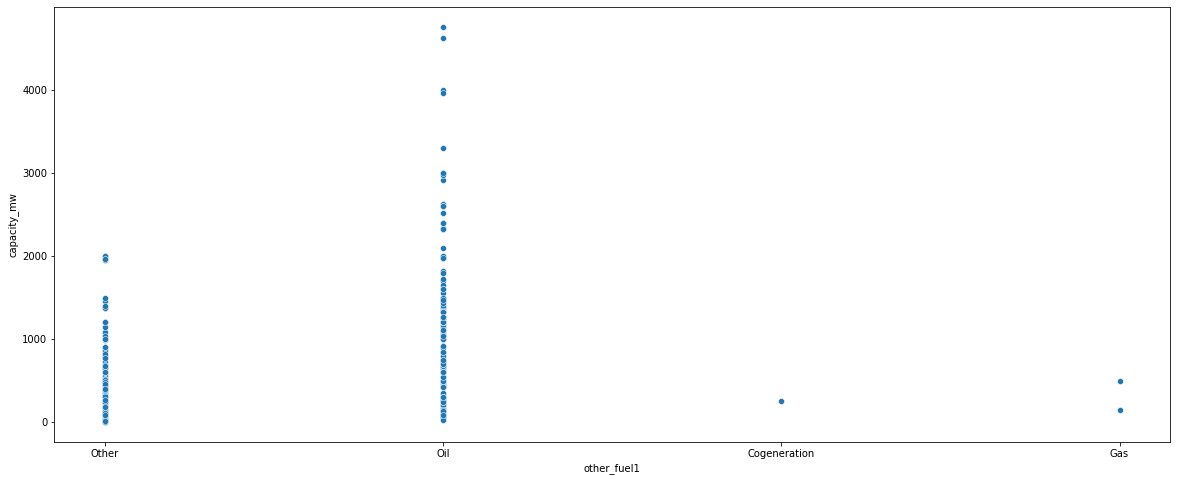

In [30]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='other_fuel1',y='capacity_mw',data=df)

When oil is use as other fuel than the primary fuel the capacity_ms is high while cogenration and gas when use as other fuel produce low capity_mw.

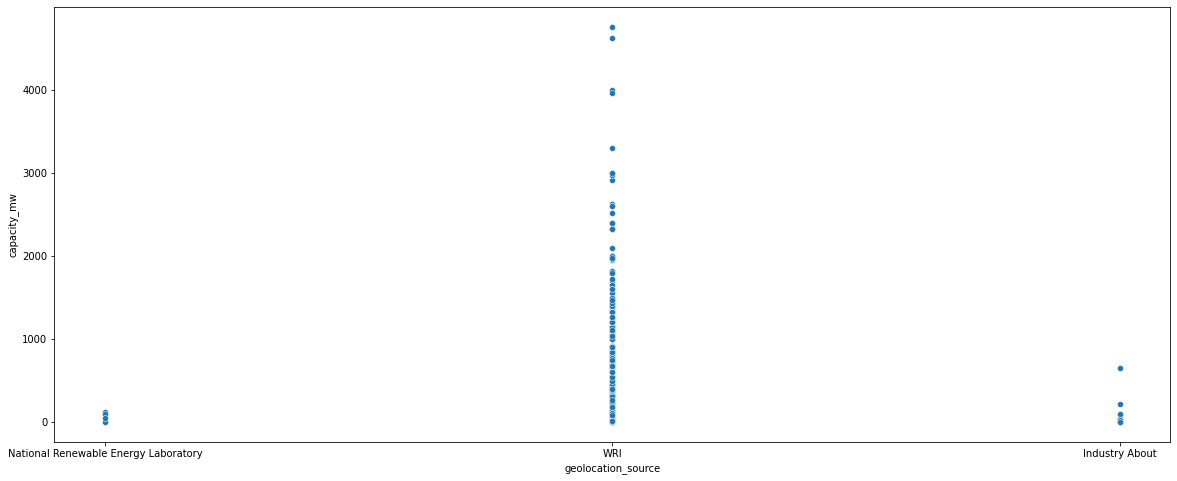

In [31]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='geolocation_source',y='capacity_mw',data=df)

Wri gelocation have maximum output.

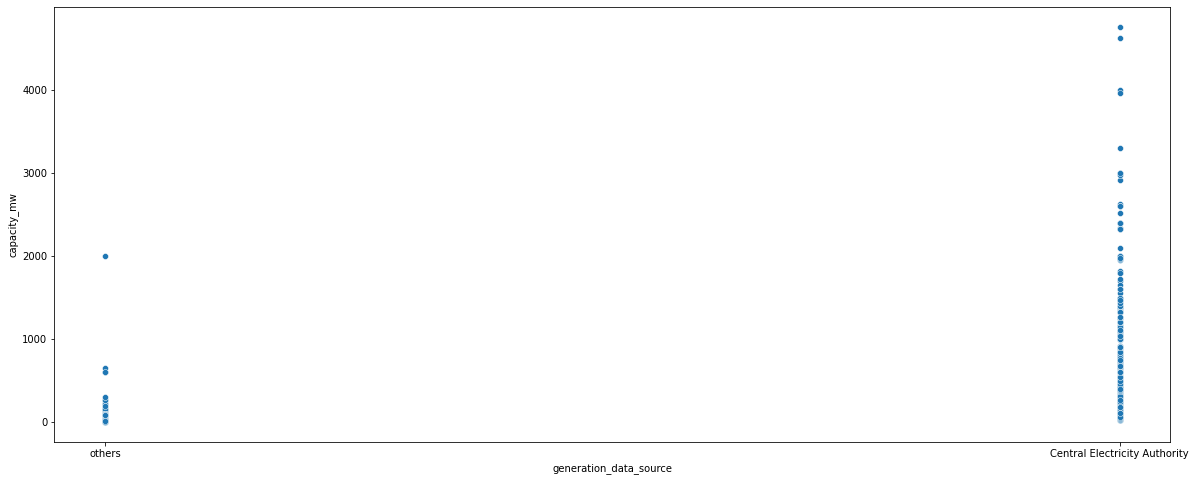

In [32]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='generation_data_source',y='capacity_mw',data=df)

In [33]:

df=df.drop(['generation_data_source'],axis=1)

generation_data_source have zero relationship with capacity_mw.

Distribution plot for contniuous dat

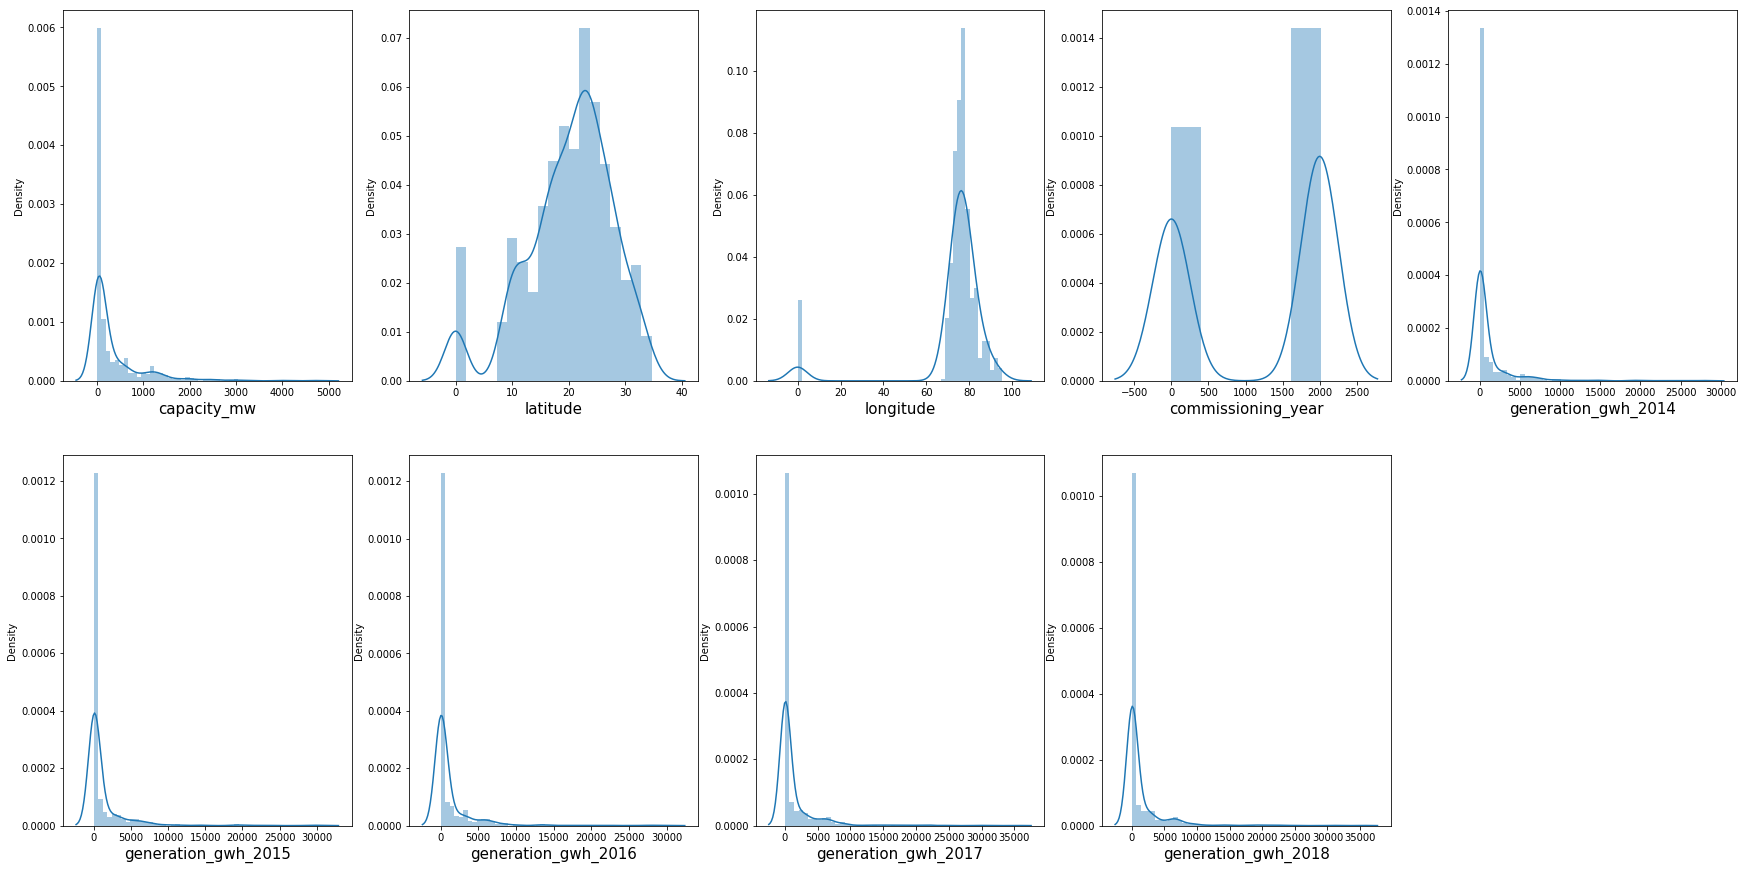

In [34]:
#visualisation of continuous data

plt.figure(figsize=(30,15))
plotnumber=1

for column in df[['capacity_mw','latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]:
  if plotnumber <= 10:
    ax=plt.subplot(2,5,plotnumber)
    sns.distplot(df[column],kde=True)
    plt.xlabel(column,fontsize=15)

    plotnumber +=1

plt.show()

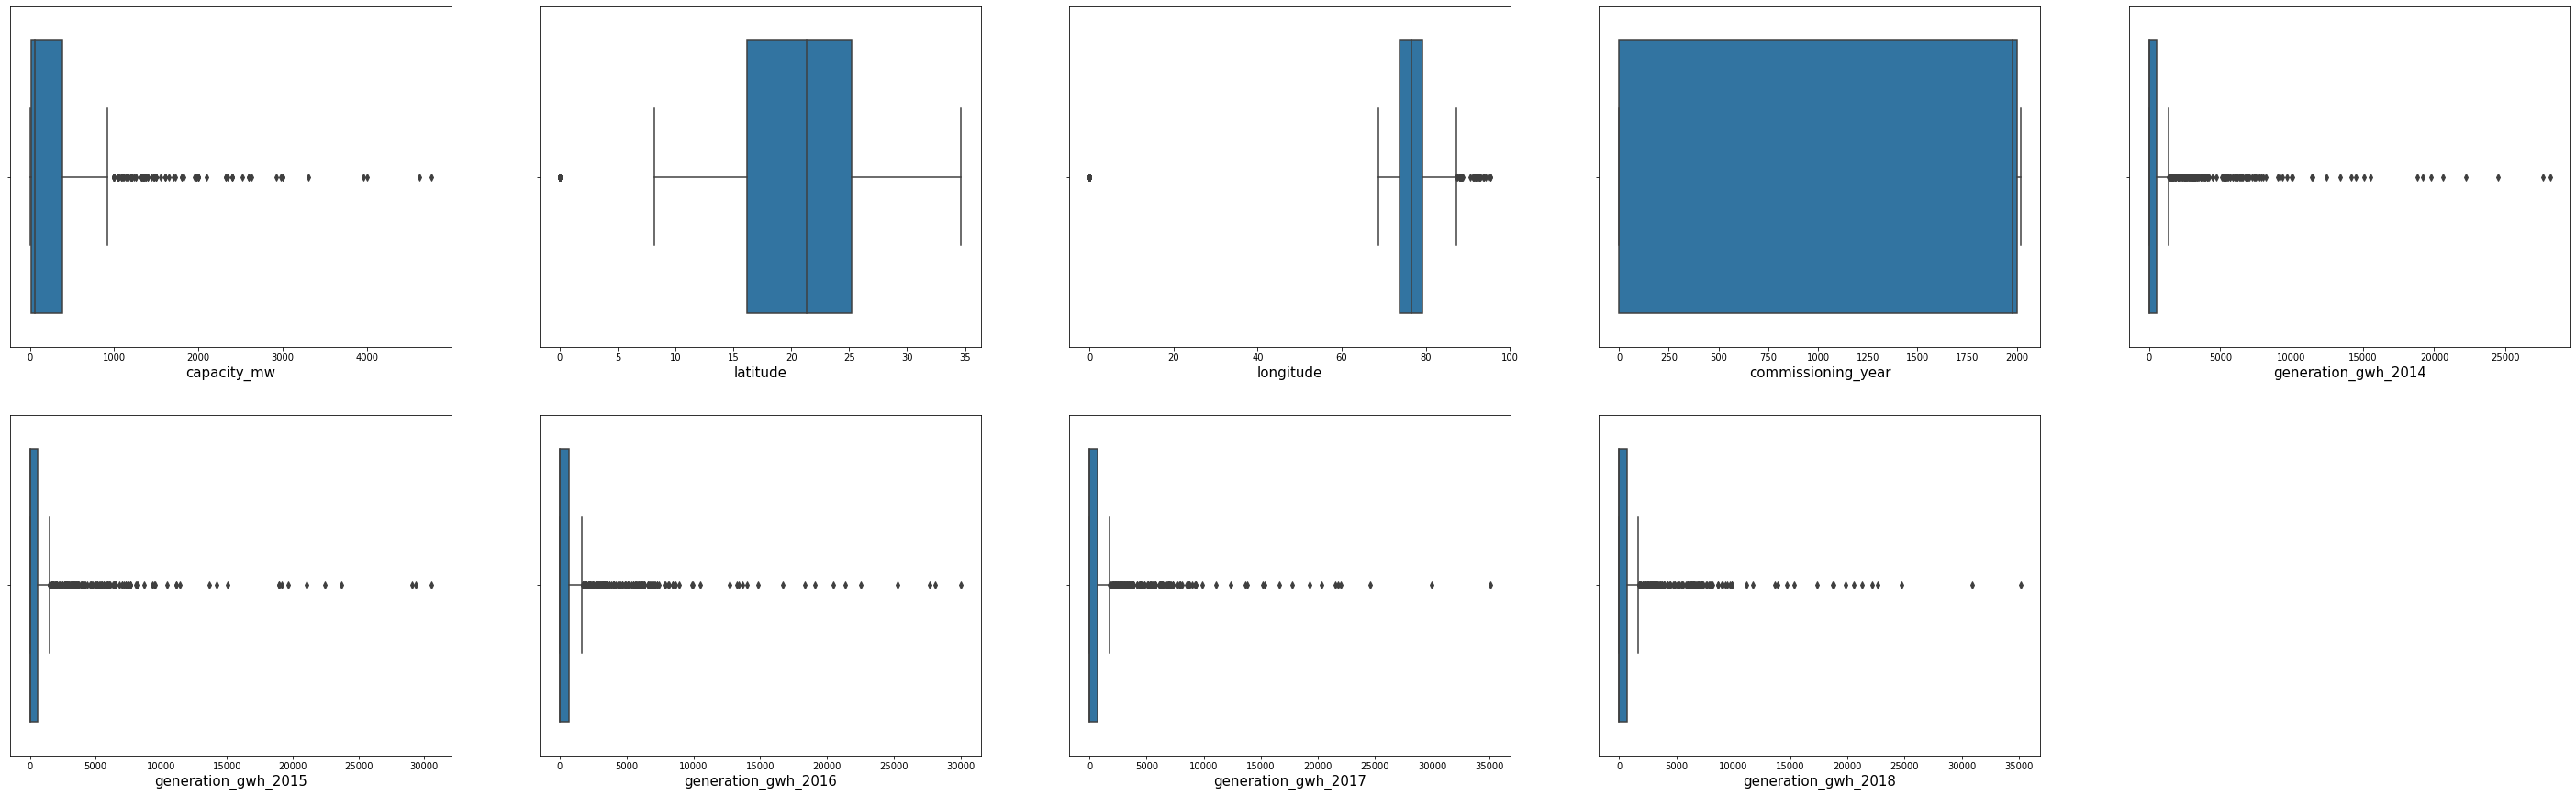

In [35]:
#plotting of bocplot graph to check the outliers

plt.figure(figsize=(50,15))
plotnumber=1

for column in df[['capacity_mw','latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]:
  if plotnumber <= 10:
    ax=plt.subplot(2,5,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=15)

    plotnumber +=1

plt.show()

In [36]:
#removing outliers

q1=df.quantile(0.25)

q3=df.quantile(0.75)

iqr=q3-q1

In [37]:
#validating outlier
capacitymw_high=(q3.capacity_mw + (1.5 * iqr.capacity_mw ))
print(capacitymw_high)


#checking the indexes with higher values
index=np.where(df['capacity_mw']>capacitymw_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

941.64375
(array([  4,  10,  12,  15,  18,  44,  57,  61,  75,  78,  93, 143, 147,
       158, 162, 166, 167, 168, 189, 209, 279, 280, 281, 288, 297, 308,
       310, 315, 319, 324, 334, 350, 352, 359, 363, 364, 366, 368, 373,
       375, 378, 390, 391, 414, 417, 448, 449, 455, 468, 471, 472, 473,
       482, 493, 494, 525, 526, 532, 535, 544, 559, 565, 578, 579, 594,
       597, 618, 622, 623, 625, 626, 630, 632, 644, 645, 648, 654, 657,
       675, 677, 681, 690, 694, 696, 699, 706, 720, 722, 723, 725, 728,
       739, 742, 766, 785, 786, 787, 791, 798, 799, 807, 819, 820, 840,
       841, 844, 848, 866, 875, 879, 882, 888, 901]),)


,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,Solar,Other,2011.0,National Renewable Energy Laboratory,0.000000,0.000,0.000000,0.0000,0.000000
1,1,98.0,24.7663,74.6090,Coal,Other,0.0,WRI,0.000000,0.000,0.000000,0.0000,0.000000
2,2,39.2,21.9038,69.3732,Wind,Other,0.0,WRI,0.000000,0.000,0.000000,0.0000,0.000000
3,3,135.0,23.8712,91.3602,Gas,Other,2004.0,WRI,617.789264,843.747,886.004428,663.7745,626.239128
4,5,250.0,23.7689,68.6447,Coal,Oil,2005.0,WRI,1153.421000,1208.852,1175.765000,1147.9130,976.655000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,901,106.6,13.1156,77.5838,Oil,Other,1993.0,WRI,0.000000,0.000,0.000000,0.0000,0.000000
789,903,3.0,12.8932,78.1654,Solar,Other,0.0,Industry About,0.000000,0.000,0.000000,0.0000,0.000000
790,904,25.5,15.2758,75.5811,Wind,Other,0.0,WRI,0.000000,0.000,0.000000,0.0000,0.000000
791,905,80.0,24.3500,73.7477,Coal,Other,0.0,WRI,0.000000,0.000,0.000000,0.0000,0.000000


In [38]:
#validating outlier
longitude_high=(q3.longitude + (1.5 * iqr.longitude ))
print(longitude_high)


#checking the indexes with higher values
index=np.where(df['longitude']>longitude_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

87.29265000000001
(array([  3,  44,  51,  92,  96, 138, 144, 159, 161, 165, 219, 224, 233,
       258, 264, 272, 294, 303, 309, 326, 347, 372, 382, 428, 444, 464,
       472, 486, 505, 515, 563, 565, 566, 576, 641, 694, 696, 697, 698,
       699, 707, 716, 736, 740, 741]),)


,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,Solar,Other,2011.0,National Renewable Energy Laboratory,0.00000,0.0000,0.00000,0.0000,0.00000
1,1,98.0,24.7663,74.6090,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
2,2,39.2,21.9038,69.3732,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
3,5,250.0,23.7689,68.6447,Coal,Oil,2005.0,WRI,1153.42100,1208.8520,1175.76500,1147.9130,976.65500
4,6,60.0,10.4547,77.0078,Hydro,Other,1970.0,WRI,157.55825,152.1952,61.42135,89.6296,48.32715
...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,901,106.6,13.1156,77.5838,Oil,Other,1993.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
744,903,3.0,12.8932,78.1654,Solar,Other,0.0,Industry About,0.00000,0.0000,0.00000,0.0000,0.00000
745,904,25.5,15.2758,75.5811,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
746,905,80.0,24.3500,73.7477,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000


In [39]:
#validating outlier
generation_gwh_2014_high=(q3.generation_gwh_2014 + (1.5 * iqr.generation_gwh_2014 ))
print(generation_gwh_2014_high)


#checking the indexes with higher values
index=np.where(df['generation_gwh_2014']>generation_gwh_2014_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

1394.4659375
(array([  7,  11,  16,  33,  35,  76,  82,  88,  94, 118, 119, 126, 138,
       146, 158, 180, 188, 190, 199, 203, 235, 238, 241, 256, 267, 269,
       270, 280, 286, 309, 317, 327, 375, 379, 399, 401, 430, 442, 446,
       447, 449, 457, 480, 483, 488, 500, 504, 535, 543, 566, 576, 600,
       609, 611, 614, 655, 657, 660, 667, 668, 669, 673, 699, 703, 705,
       722, 726, 741]),)


,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,Solar,Other,2011.0,National Renewable Energy Laboratory,0.00000,0.0000,0.00000,0.0000,0.00000
1,1,98.0,24.7663,74.6090,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
2,2,39.2,21.9038,69.3732,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
3,5,250.0,23.7689,68.6447,Coal,Oil,2005.0,WRI,1153.42100,1208.8520,1175.76500,1147.9130,976.65500
4,6,60.0,10.4547,77.0078,Hydro,Other,1970.0,WRI,157.55825,152.1952,61.42135,89.6296,48.32715
...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,901,106.6,13.1156,77.5838,Oil,Other,1993.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
676,903,3.0,12.8932,78.1654,Solar,Other,0.0,Industry About,0.00000,0.0000,0.00000,0.0000,0.00000
677,904,25.5,15.2758,75.5811,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
678,905,80.0,24.3500,73.7477,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000


In [40]:
#validating outlier
generation_gwh_2015_high=(q3.generation_gwh_2015 + (1.5 * iqr.generation_gwh_2015 ))
print(generation_gwh_2015_high)


#checking the indexes with higher values
index=np.where(df['generation_gwh_2015']>generation_gwh_2015_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

1500.3954375
(array([272, 353, 452, 486, 604, 665]),)


,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,Solar,Other,2011.0,National Renewable Energy Laboratory,0.00000,0.0000,0.00000,0.0000,0.00000
1,1,98.0,24.7663,74.6090,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
2,2,39.2,21.9038,69.3732,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
3,5,250.0,23.7689,68.6447,Coal,Oil,2005.0,WRI,1153.42100,1208.8520,1175.76500,1147.9130,976.65500
4,6,60.0,10.4547,77.0078,Hydro,Other,1970.0,WRI,157.55825,152.1952,61.42135,89.6296,48.32715
...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,901,106.6,13.1156,77.5838,Oil,Other,1993.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
670,903,3.0,12.8932,78.1654,Solar,Other,0.0,Industry About,0.00000,0.0000,0.00000,0.0000,0.00000
671,904,25.5,15.2758,75.5811,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
672,905,80.0,24.3500,73.7477,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000


In [41]:
#validating outlier
generation_gwh_2016_high=(q3.generation_gwh_2016 + (1.5 * iqr.generation_gwh_2016 ))
print(generation_gwh_2016_high)


#checking the indexes with higher values
index=np.where(df['generation_gwh_2016']>generation_gwh_2016_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after
df.reset_index()

1675.6750549999997
(array([ 31,  33, 544]),)


,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,Solar,Other,2011.0,National Renewable Energy Laboratory,0.00000,0.0000,0.00000,0.0000,0.00000
1,1,98.0,24.7663,74.6090,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
2,2,39.2,21.9038,69.3732,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
3,5,250.0,23.7689,68.6447,Coal,Oil,2005.0,WRI,1153.42100,1208.8520,1175.76500,1147.9130,976.65500
4,6,60.0,10.4547,77.0078,Hydro,Other,1970.0,WRI,157.55825,152.1952,61.42135,89.6296,48.32715
...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,901,106.6,13.1156,77.5838,Oil,Other,1993.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
667,903,3.0,12.8932,78.1654,Solar,Other,0.0,Industry About,0.00000,0.0000,0.00000,0.0000,0.00000
668,904,25.5,15.2758,75.5811,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
669,905,80.0,24.3500,73.7477,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000


In [42]:
#validating outlier
generation_gwh_2017_high=(q3.generation_gwh_2017 + (1.5 * iqr.generation_gwh_2017 ))
print(generation_gwh_2017_high)


#checking the indexes with higher values
index=np.where(df['generation_gwh_2017']>generation_gwh_2017_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

1776.11853125
(array([ 35,  78, 131, 402]),)


,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,Solar,Other,2011.0,National Renewable Energy Laboratory,0.00000,0.0000,0.00000,0.0000,0.00000
1,1,98.0,24.7663,74.6090,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
2,2,39.2,21.9038,69.3732,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
3,5,250.0,23.7689,68.6447,Coal,Oil,2005.0,WRI,1153.42100,1208.8520,1175.76500,1147.9130,976.65500
4,6,60.0,10.4547,77.0078,Hydro,Other,1970.0,WRI,157.55825,152.1952,61.42135,89.6296,48.32715
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,901,106.6,13.1156,77.5838,Oil,Other,1993.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
663,903,3.0,12.8932,78.1654,Solar,Other,0.0,Industry About,0.00000,0.0000,0.00000,0.0000,0.00000
664,904,25.5,15.2758,75.5811,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
665,905,80.0,24.3500,73.7477,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000


In [43]:
#validating outlier
generation_gwh_2018_high=(q3.generation_gwh_2018 + (1.5 * iqr.generation_gwh_2018 ))
print(generation_gwh_2018_high)


#checking the indexes with higher values
index=np.where(df['generation_gwh_2018']>generation_gwh_2018_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

1720.9525
(array([ 32, 180, 376, 387, 519]),)


,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,Solar,Other,2011.0,National Renewable Energy Laboratory,0.00000,0.0000,0.00000,0.0000,0.00000
1,1,98.0,24.7663,74.6090,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
2,2,39.2,21.9038,69.3732,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
3,5,250.0,23.7689,68.6447,Coal,Oil,2005.0,WRI,1153.42100,1208.8520,1175.76500,1147.9130,976.65500
4,6,60.0,10.4547,77.0078,Hydro,Other,1970.0,WRI,157.55825,152.1952,61.42135,89.6296,48.32715
...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,901,106.6,13.1156,77.5838,Oil,Other,1993.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
658,903,3.0,12.8932,78.1654,Solar,Other,0.0,Industry About,0.00000,0.0000,0.00000,0.0000,0.00000
659,904,25.5,15.2758,75.5811,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
660,905,80.0,24.3500,73.7477,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000


In [44]:
#validating outlier
latitude_low=(q1.latitude - (1.5 * iqr.generation_gwh_2014 ))
print(latitude_low)


#checking the indexes with higher values
index=np.where(df['latitude']<latitude_low)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

-820.4691624999999
(array([], dtype=int64),)


,index,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,Solar,Other,2011.0,National Renewable Energy Laboratory,0.00000,0.0000,0.00000,0.0000,0.00000
1,1,98.0,24.7663,74.6090,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
2,2,39.2,21.9038,69.3732,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
3,5,250.0,23.7689,68.6447,Coal,Oil,2005.0,WRI,1153.42100,1208.8520,1175.76500,1147.9130,976.65500
4,6,60.0,10.4547,77.0078,Hydro,Other,1970.0,WRI,157.55825,152.1952,61.42135,89.6296,48.32715
...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,901,106.6,13.1156,77.5838,Oil,Other,1993.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
658,903,3.0,12.8932,78.1654,Solar,Other,0.0,Industry About,0.00000,0.0000,0.00000,0.0000,0.00000
659,904,25.5,15.2758,75.5811,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000
660,905,80.0,24.3500,73.7477,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,0.0000,0.00000


encoding the data

In [45]:
df1=pd.get_dummies(df[['primary_fuel','other_fuel1','geolocation_source']],drop_first=True)

In [46]:
df1

,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,other_fuel1_Oil,other_fuel1_Other,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,0,0,0,0,0,1,0,0,1,1,0
1,1,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,1,0,1,0,1
5,1,0,0,0,0,0,0,1,0,0,1
6,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
901,0,0,0,0,1,0,0,0,1,0,1
903,0,0,0,0,0,1,0,0,1,0,0
904,0,0,0,0,0,0,1,0,1,0,1
905,1,0,0,0,0,0,0,0,1,0,1


In [47]:
data=pd.concat([df,df1],axis=1,join='inner')

In [48]:
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,...,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,other_fuel1_Oil,other_fuel1_Other,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,28.1839,73.2407,Solar,Other,2011.0,National Renewable Energy Laboratory,0.00000,0.0000,0.00000,...,0,0,0,0,1,0,0,1,1,0
1,98.0,24.7663,74.6090,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,...,0,0,0,0,0,0,0,1,0,1
2,39.2,21.9038,69.3732,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,...,0,0,0,0,0,1,0,1,0,1
5,250.0,23.7689,68.6447,Coal,Oil,2005.0,WRI,1153.42100,1208.8520,1175.76500,...,0,0,0,0,0,0,1,0,0,1
6,60.0,10.4547,77.0078,Hydro,Other,1970.0,WRI,157.55825,152.1952,61.42135,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,106.6,13.1156,77.5838,Oil,Other,1993.0,WRI,0.00000,0.0000,0.00000,...,0,0,0,1,0,0,0,1,0,1
903,3.0,12.8932,78.1654,Solar,Other,0.0,Industry About,0.00000,0.0000,0.00000,...,0,0,0,0,1,0,0,1,0,0
904,25.5,15.2758,75.5811,Wind,Other,0.0,WRI,0.00000,0.0000,0.00000,...,0,0,0,0,0,1,0,1,0,1
905,80.0,24.3500,73.7477,Coal,Other,0.0,WRI,0.00000,0.0000,0.00000,...,0,0,0,0,0,0,0,1,0,1


In [49]:
df=data.drop(['primary_fuel','other_fuel1','geolocation_source'], axis=1)

In [50]:
df.head()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,other_fuel1_Oil,other_fuel1_Other,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,28.1839,73.2407,2011.0,0.00000,0.0000,0.00000,0.0000,0.00000,0,0,0,0,0,1,0,0,1,1,0
1,98.0,24.7663,74.6090,0.0,0.00000,0.0000,0.00000,0.0000,0.00000,1,0,0,0,0,0,0,0,1,0,1
2,39.2,21.9038,69.3732,0.0,0.00000,0.0000,0.00000,0.0000,0.00000,0,0,0,0,0,0,1,0,1,0,1
5,250.0,23.7689,68.6447,2005.0,1153.42100,1208.8520,1175.76500,1147.9130,976.65500,1,0,0,0,0,0,0,1,0,0,1
6,60.0,10.4547,77.0078,1970.0,157.55825,152.1952,61.42135,89.6296,48.32715,0,0,1,0,0,0,0,0,1,0,1


In [51]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'primary_fuel_Coal',
       'primary_fuel_Gas', 'primary_fuel_Hydro', 'primary_fuel_Nuclear',
       'primary_fuel_Oil', 'primary_fuel_Solar', 'primary_fuel_Wind',
       'other_fuel1_Oil', 'other_fuel1_Other',
       'geolocation_source_National Renewable Energy Laboratory',
       'geolocation_source_WRI'],
      dtype='object')

In [52]:
#satistics of the data
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,other_fuel1_Oil,other_fuel1_Other,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,83.400219,19.272322,71.015607,857.667674,109.900418,101.256487,97.899350,101.360450,108.292608,0.154079,0.070997,0.293051,0.001511,0.030211,0.190332,0.184290,0.057402,0.939577,0.006042,0.815710
std,134.583279,8.017168,19.017526,987.255064,259.972355,245.348283,243.433114,253.976690,261.096118,0.361297,0.257014,0.455506,0.038866,0.171298,0.392860,0.388014,0.232785,0.238449,0.077556,0.388014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.300000,15.172450,73.009450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,30.000000,19.893550,75.578050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,91.012500,24.698850,77.590875,1992.000000,2.164325,8.795800,20.298000,16.559287,36.150838,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,815.600000,34.649000,87.250000,2018.000000,1393.879000,1459.399526,1464.580300,1687.044000,1638.067000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


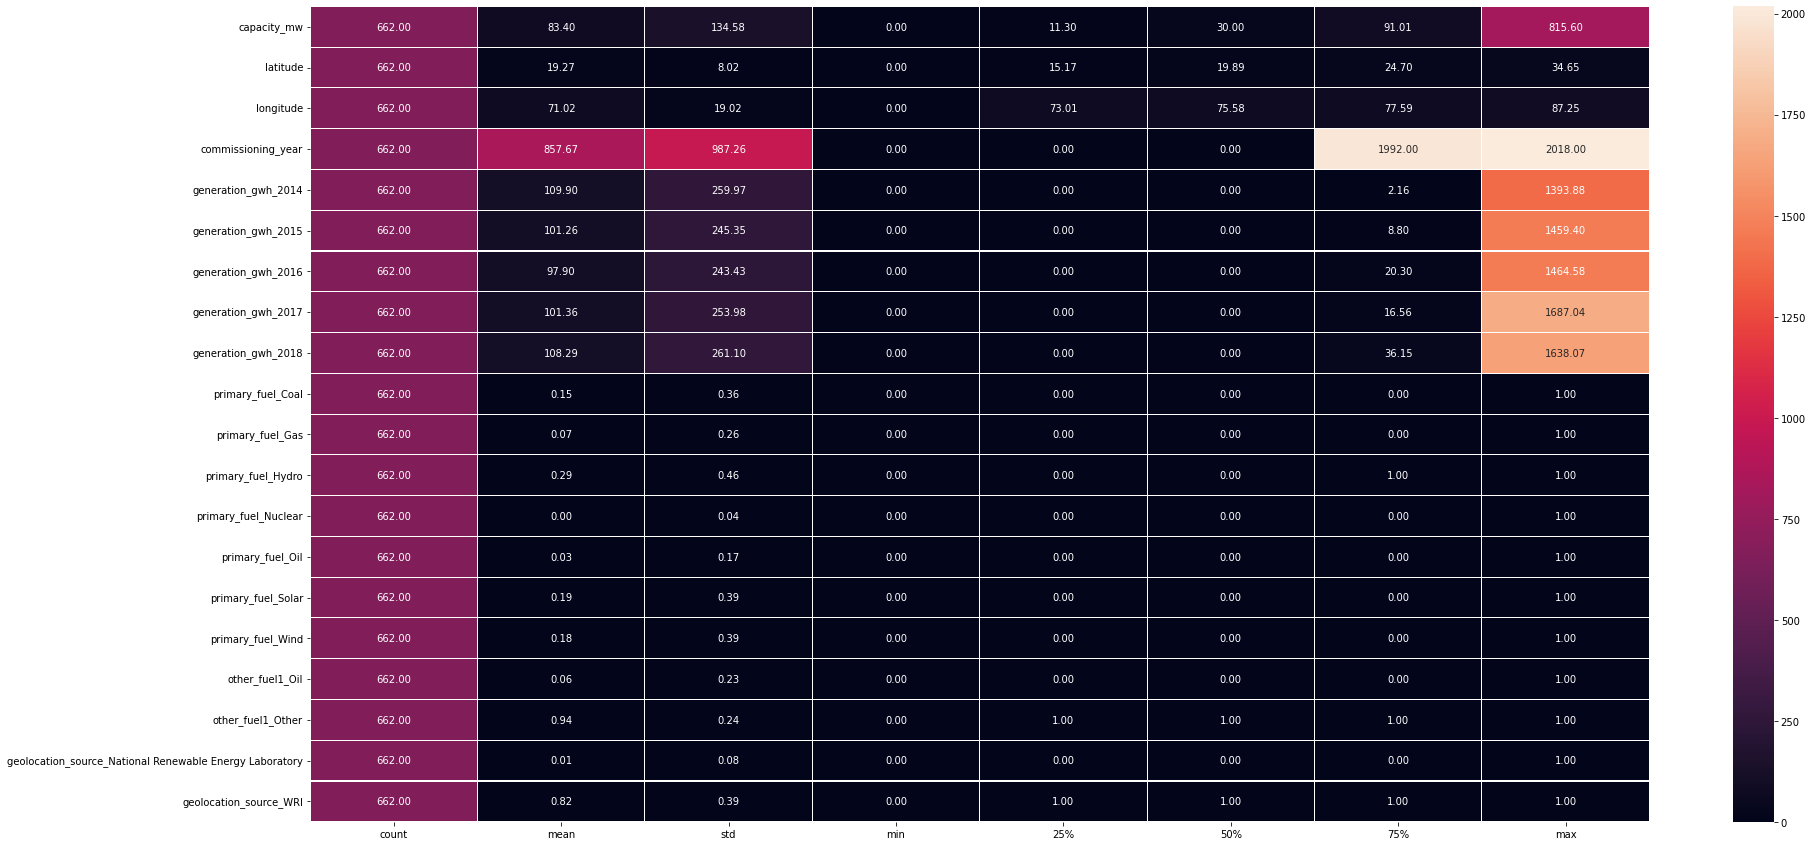

In [53]:
plt.figure(figsize=(30,15))
sns.heatmap(df.describe().T,annot=True,linewidths=0.1,linecolor='white',fmt='0.2f');

In [54]:
df.corr()['capacity_mw'].sort_values()

other_fuel1_Other                                         -0.358841
primary_fuel_Solar                                        -0.221923
primary_fuel_Wind                                         -0.176301
geolocation_source_National Renewable Energy Laboratory   -0.008131
primary_fuel_Nuclear                                       0.004801
primary_fuel_Oil                                           0.007273
latitude                                                   0.064577
primary_fuel_Hydro                                         0.091764
longitude                                                  0.124933
primary_fuel_Coal                                          0.168910
geolocation_source_WRI                                     0.221636
primary_fuel_Gas                                           0.338238
other_fuel1_Oil                                            0.344239
commissioning_year                                         0.411308
generation_gwh_2017                             

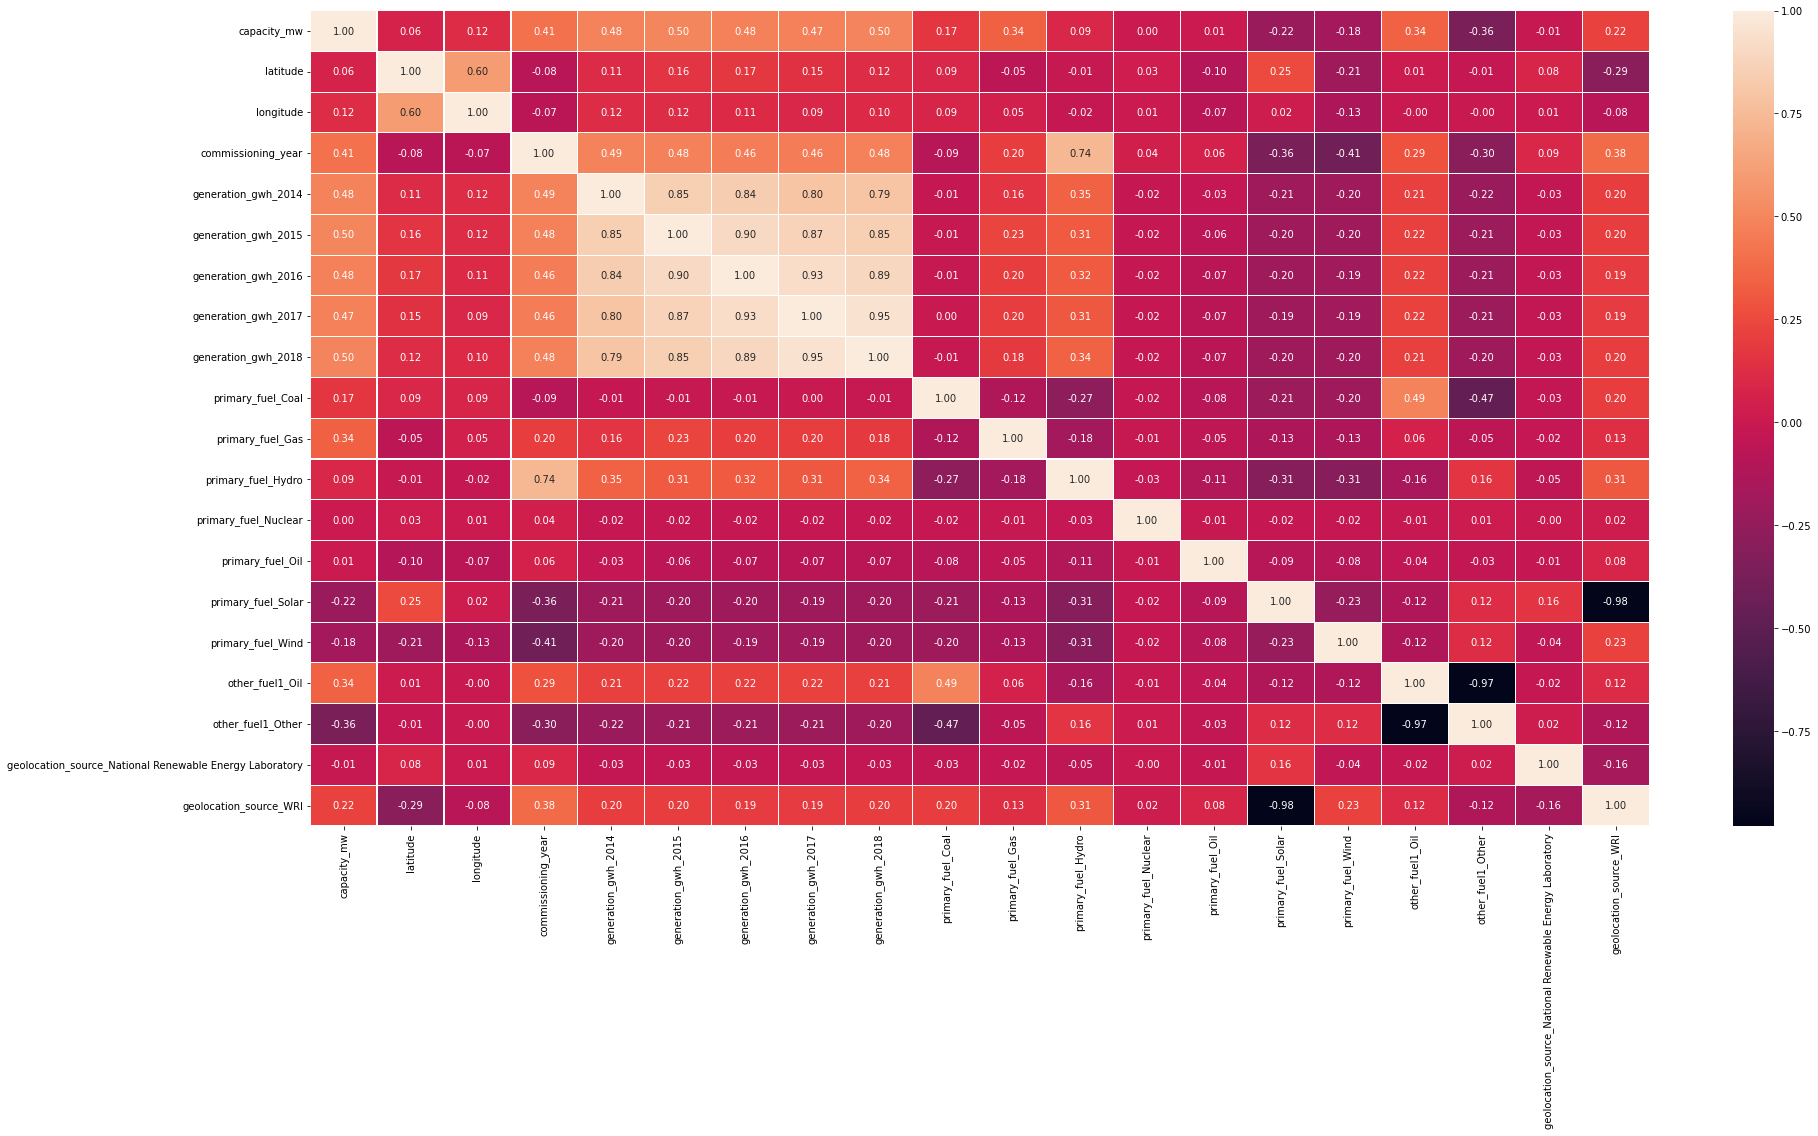

In [55]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='white',fmt='0.2f');

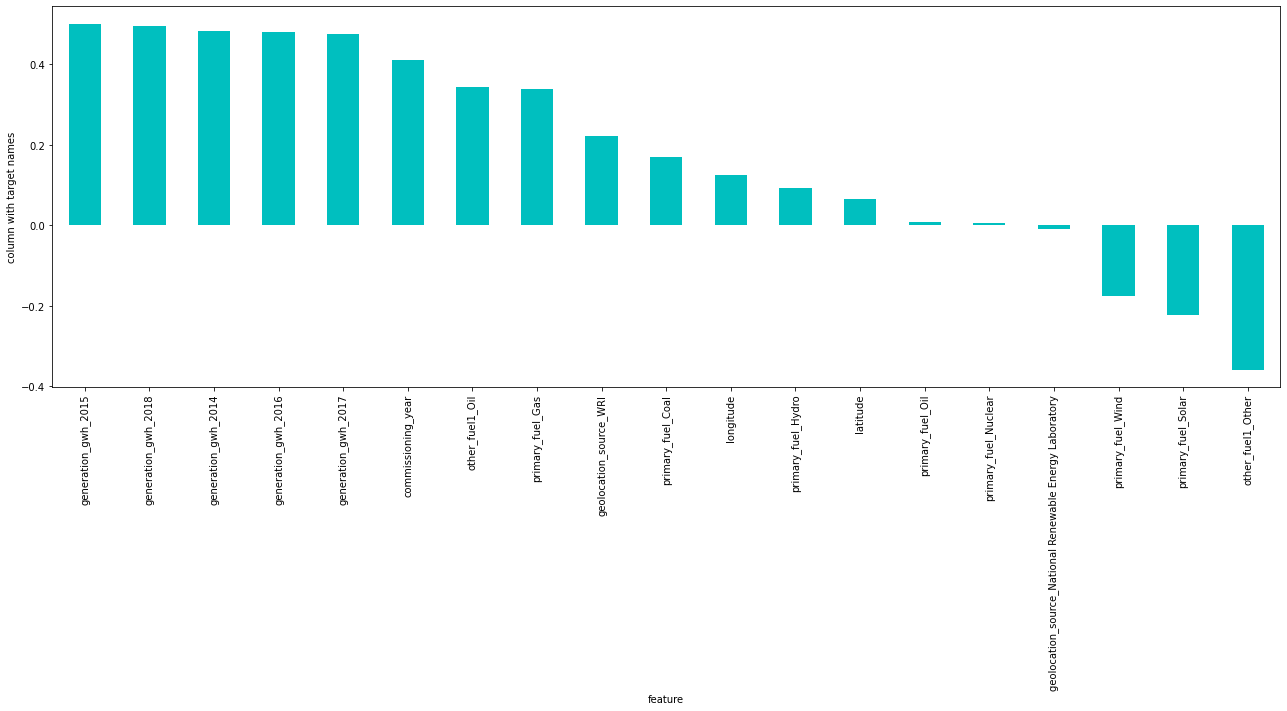

In [56]:
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')

plt.xlabel('feature')
plt.ylabel('column with target names')
plt.show()

primary_fuel_oil,nuclear and geoloacation have least relation with target

In [57]:
X=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

Standardising the data

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
sc=StandardScaler()

In [60]:
data=sc.fit_transform(X)

In [61]:
x=pd.DataFrame(data,columns=X.columns)

In [62]:
x.head()

,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,other_fuel1_Oil,other_fuel1_Other,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,1.112402,0.117091,1.169105,-0.423059,-0.413017,-0.402465,-0.399395,-0.415075,-0.426782,-0.276447,-0.643840,-0.038895,-0.176501,2.062515,-0.475317,-0.246774,0.253592,12.825755,-2.103861
1,0.685795,0.189095,-0.869397,-0.423059,-0.413017,-0.402465,-0.399395,-0.415075,2.343117,-0.276447,-0.643840,-0.038895,-0.176501,-0.484845,-0.475317,-0.246774,0.253592,-0.077968,0.475317
2,0.328479,-0.086428,-0.869397,-0.423059,-0.413017,-0.402465,-0.399395,-0.415075,-0.426782,-0.276447,-0.643840,-0.038895,-0.176501,-0.484845,2.103861,-0.246774,0.253592,-0.077968,0.475317
3,0.561293,-0.124764,1.163023,4.017003,4.517794,4.431117,4.123780,3.328349,2.343117,-0.276447,-0.643840,-0.038895,-0.176501,-0.484845,-0.475317,4.052290,-3.943349,-0.077968,0.475317
4,-1.100674,0.315326,1.127544,0.183457,0.207775,-0.149961,-0.046224,-0.229842,-0.426782,-0.276447,1.553181,-0.038895,-0.176501,-0.484845,-0.475317,-0.246774,0.253592,-0.077968,0.475317


#MODEL TRAINING

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
lr=LinearRegression()

LINEAR REGRESSION

In [64]:
for i in range(0,100):
  x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
  lr.fit(x_train,y_train)
  pred_train=lr.predict(x_train)
  pred_test=lr.predict(x_test)
  print(f'At random state {i} the training accuracy score is :{r2_score(y_train,pred_train)}' )
  print(f'At random state {i} the testing accuracy score is :{r2_score(y_test,pred_test)}' )
  print('\n')

At random state 0 the training accuracy score is :0.5059520144499048
At random state 0 the testing accuracy score is :0.21078847648699595


At random state 1 the training accuracy score is :0.4541749307274475
At random state 1 the testing accuracy score is :0.2514985043990636


At random state 2 the training accuracy score is :0.4532609319223736
At random state 2 the testing accuracy score is :0.35479699479390914


At random state 3 the training accuracy score is :0.45519740949571863
At random state 3 the testing accuracy score is :0.3675980459946021


At random state 4 the training accuracy score is :0.45049094062376105
At random state 4 the testing accuracy score is :0.29493811431649786


At random state 5 the training accuracy score is :0.4191971275916897
At random state 5 the testing accuracy score is :0.5052796906147015


At random state 6 the training accuracy score is :0.45657385554330787
At random state 6 the testing accuracy score is :0.34859126188323786


At random state 7 th

In [65]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [66]:
#train the model

lr.fit(x_train,y_train)

LinearRegression()

In [67]:
pred_test=lr.predict(x_test)

In [68]:
print(r2_score(y_test,pred_test))

0.4369878836608395


CROSS VALIDATION

In [69]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,10):
  cv_score=cross_val_score(lr,X,y,cv=i)
  cv_mean=cv_score.mean()
  print(f'At cross fold {i} cv score is {cv_mean} and the accuracy score is {train_accuracy} and testing score is {test_accuracy}')
  print('\n')

At cross fold 2 cv score is 0.2940250534926209 and the accuracy score is -0.3933425209759056 and testing score is 0.4369878836608395


At cross fold 3 cv score is 0.32778249447464686 and the accuracy score is -0.3933425209759056 and testing score is 0.4369878836608395


At cross fold 4 cv score is 0.37094310146124765 and the accuracy score is -0.3933425209759056 and testing score is 0.4369878836608395


At cross fold 5 cv score is 0.37082930260828423 and the accuracy score is -0.3933425209759056 and testing score is 0.4369878836608395


At cross fold 6 cv score is 0.32002765365984676 and the accuracy score is -0.3933425209759056 and testing score is 0.4369878836608395


At cross fold 7 cv score is 0.32094398542533487 and the accuracy score is -0.3933425209759056 and testing score is 0.4369878836608395


At cross fold 8 cv score is 0.3592953558865365 and the accuracy score is -0.3933425209759056 and testing score is 0.4369878836608395


At cross fold 9 cv score is 0.3253603107398058 and

In [70]:
cv_score=cross_val_score(lr,X,y,cv=4).mean()

print(f'the cv score is {cv_score} and the accuracy score is {test_accuracy}')

the cv score is 0.37094310146124765 and the accuracy score is 0.4369878836608395


RANDOM FOREST REGRESSOR

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
rf=RandomForestRegressor()

In [73]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [74]:
rf_train_pred=rf.predict(x_train)

In [75]:
rf_test_pred=rf.predict(x_test)

In [76]:
print(r2_score(y_test,rf_test_pred))

0.7218292154028988


DECISION TREE REGRESSOR

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
dt=DecisionTreeRegressor()

In [79]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [80]:
dt_train_pred=dt.predict(x_train)

In [81]:
dt_test_pred=dt.predict(x_test)

In [82]:
print(r2_score(y_test,dt_test_pred))

0.2723148910032034


GRID SERCAH CV(RANDOM FOREST REGRESSOR)

In [83]:
param_grid = { 'criterion' : ['mse','mae'],
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [84]:
from sklearn.model_selection import  GridSearchCV

In [85]:
clf=GridSearchCV(rf,param_grid)

In [86]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [87]:
print(clf.best_params_)

{'bootstrap': True, 'criterion': 'mae', 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 20}


In [88]:
rf=RandomForestRegressor(bootstrap= True, criterion= 'mse', max_features= 'log2', min_samples_split=4, n_estimators= 30)

In [89]:
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_features='log2', min_samples_split=4,
                      n_estimators=30)

In [90]:
rf_train_pred=rf.predict(x_train)

In [91]:
rf_test_pred=rf.predict(x_test)

In [92]:
print(r2_score(y_test,rf_test_pred))

0.6357139638966347


#LOADING THE DATA

In [93]:
import joblib

In [94]:
joblib.dump(rf,'global_power_capacity_mw.obj')

['global_power_capacity_mw.obj']

In [95]:
model=joblib.load('global_power_capacity_mw.obj')

In [96]:
result=model.predict(x_test)

In [97]:
r2_score(y_test,result)

0.6357139638966347

In [98]:
predicted_values=pd.DataFrame({'Actual':y_test,'Predicted':result})

In [99]:
predicted_values

,Actual,Predicted
711,150.00,207.264841
106,165.00,171.635000
489,15.00,124.364444
662,10.00,7.354444
223,468.57,313.642739
...,...,...
127,5.00,31.415667
647,250.00,294.981267
91,80.00,57.071389
905,80.00,90.076821


RANDOM FOREST REGRESSOR HAS ACCURACY OF 63%.